In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os
%matplotlib inline

In [2]:
#load data 
df = pd.read_csv('datasets_12603_17232_Life Expectancy Data.csv')

In [3]:
df.rename(columns = lambda x: x.strip().replace(' ', '_').lower(), inplace=True)
df.rename(columns = {'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [4]:
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_10-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [5]:
#let's look at the distributions of our continuous variables
num_cols = ['life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling']

na_cols = ['life_expectancy', 'adult_mortality', 'alcohol', 'hepatitis_b',
       'bmi', 'polio', 'total_expenditure','diphtheria', 'gdp', 'population', 
        'thinness_10-19_years', 'thinness_5-9_years', 
        'income_composition_of_resources', 'schooling']

In [6]:
# replace NaN by mean 
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

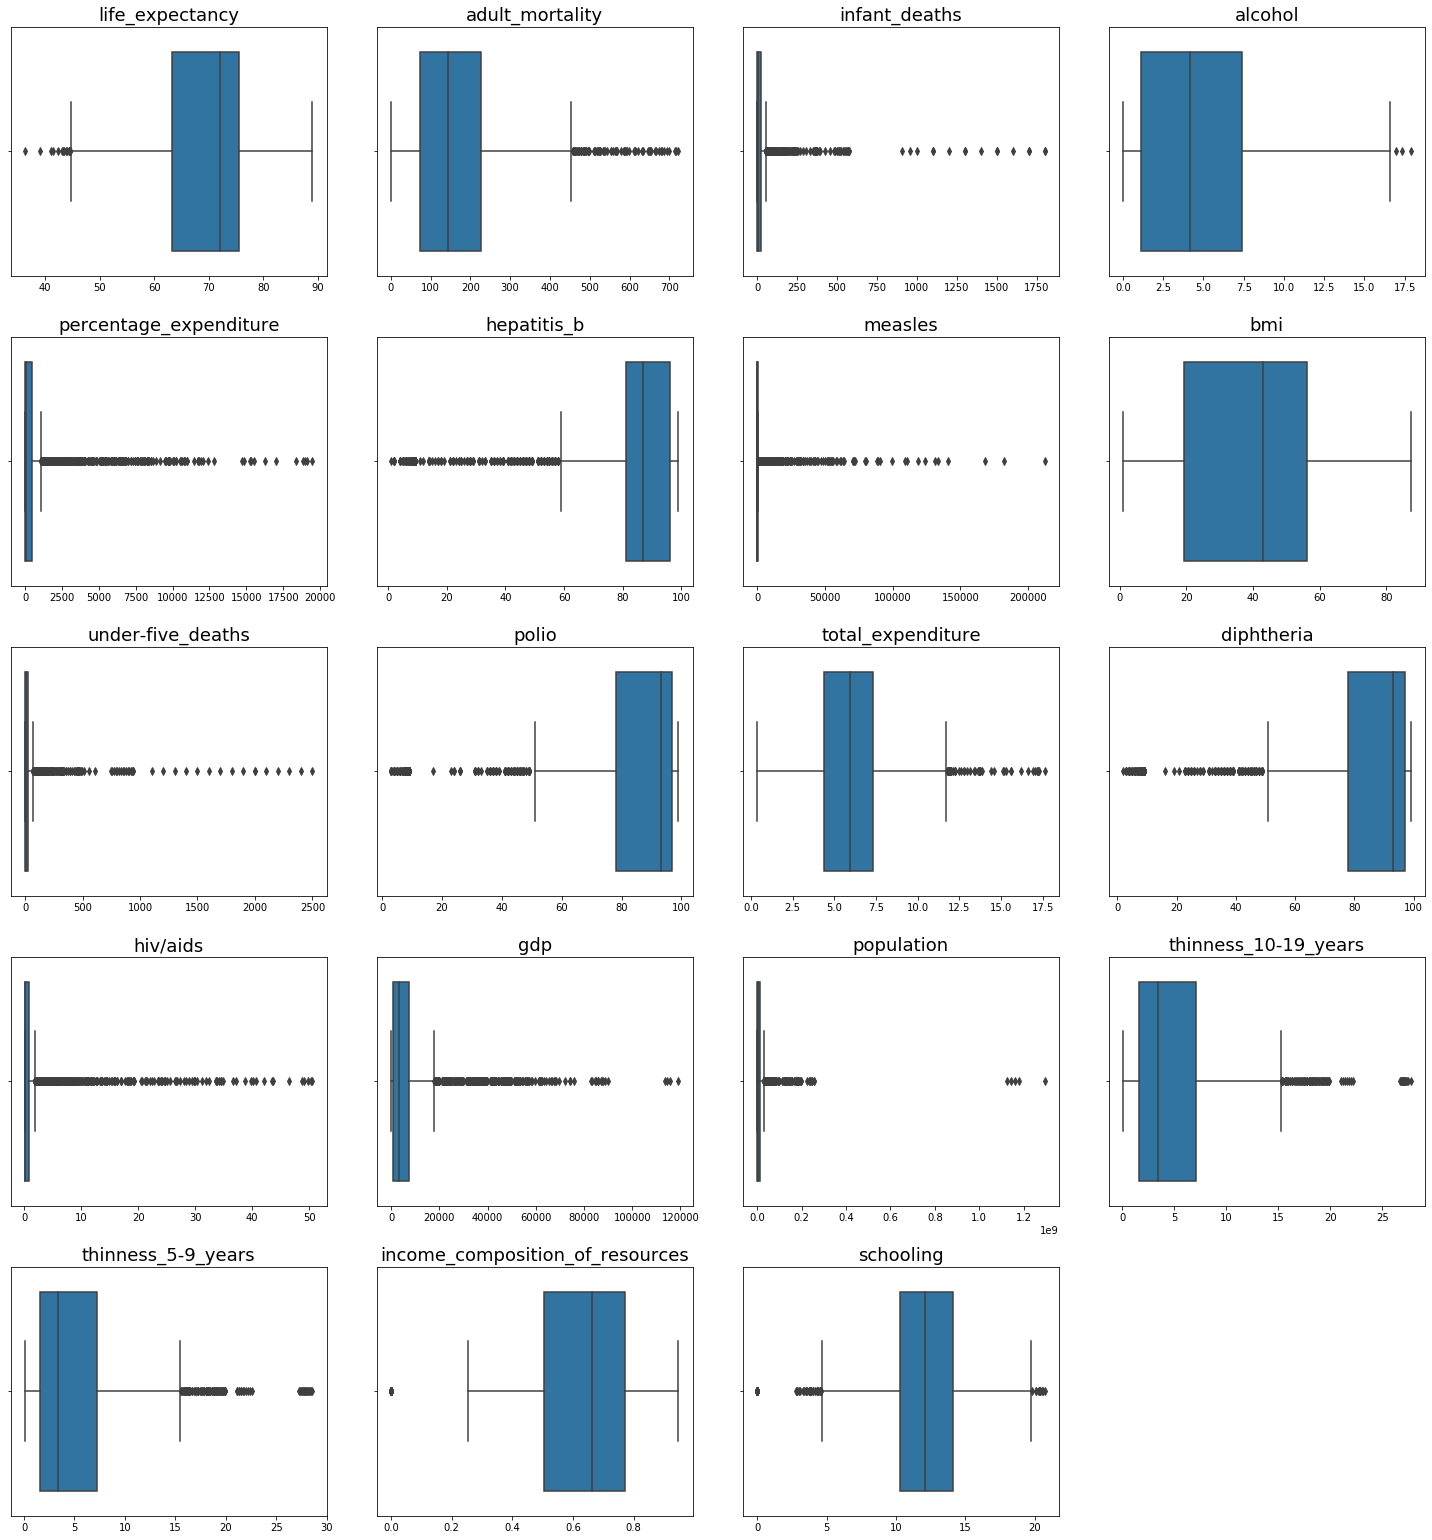

In [7]:
# detecting outliers
plt.figure(figsize=(20,60))

for i, col in enumerate(num_cols):
    plt.subplot(len(na_cols), 4, i+1)
    sns.boxplot(df[col])
    plt.title(f'{col}', fontsize=18)
    plt.xlabel('')

plt.tight_layout()
plt.show()